##Introduction to Convolutional Neural Network:
Computer vision is a practice of writing algorithms which can discover patterns in the visual data such as camera images 

## Get the data


In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2022-05-14 00:20:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 173.194.216.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   158MB/s    in 0.7s    

2022-05-14 00:20:45 (158 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspect the data

An important step in beginning of any machine learning problem is to become one with the data, in case of CNN dataset we have ti visualize the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
import os
# To check the structure of the directory and list the number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'pizza_steak' .
There are 2 directories and 0 images in 'pizza_steak/test' .
There are 0 directories and 250 images in 'pizza_steak/test/pizza' .
There are 0 directories and 250 images in 'pizza_steak/test/steak' .
There are 2 directories and 0 images in 'pizza_steak/train' .
There are 0 directories and 750 images in 'pizza_steak/train/pizza' .
There are 0 directories and 750 images in 'pizza_steak/train/steak' .


In [ ]:
# Another way to find out how many images in file
len(os.listdir("pizza_steak/train/steak"))


750

## To Visualize our images lets get the class name programmatically

In [ ]:
# Get the calssnames programmtically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the sundirectorie
print(class_names) 

['pizza' 'steak']


In [ ]:
os.listdir("pizza_steak/train")

['pizza', 'steak']

In [ ]:
# Let's Visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random
def view_random_images(target_dir, target_class):
  # Setup the target directory(we'll view images from here)
  target_folder = target_dir + "/" + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  #Read in the images and plot it using matplot lib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape :{img.shape}")
  return img

['702165.jpg']
Image shape :(512, 512, 3)


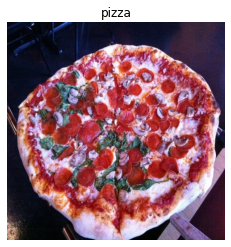

In [ ]:
# View random image 

img = view_random_images(target_dir = "pizza_steak/train",target_class = "pizza")

##Preprocessing the data

In [ ]:
# View the shape of the image
img.shape
# (width, height , color channels)

(512, 512, 3)

In [ ]:
# Get the all pixels values between 0 & 1 (Normalized or scalled)
img.max()

255

In [ ]:
img/225. # 225 is max pixel value

array([[[0.03111111, 0.03111111, 0.06666667],
        [0.02666667, 0.02666667, 0.06222222],
        [0.02666667, 0.02666667, 0.06222222],
        ...,
        [0.15111111, 0.13777778, 0.25777778],
        [0.16      , 0.14666667, 0.26666667],
        [0.16888889, 0.15555556, 0.27555556]],

       [[0.03555556, 0.03555556, 0.07111111],
        [0.03555556, 0.03555556, 0.07111111],
        [0.04      , 0.04      , 0.07555556],
        ...,
        [0.15111111, 0.13777778, 0.25777778],
        [0.14222222, 0.12888889, 0.24888889],
        [0.13777778, 0.12444444, 0.24444444]],

       [[0.04      , 0.03555556, 0.06222222],
        [0.04444444, 0.04      , 0.06666667],
        [0.04888889, 0.04444444, 0.08      ],
        ...,
        [0.15111111, 0.13777778, 0.25777778],
        [0.13777778, 0.12444444, 0.24444444],
        [0.12444444, 0.11111111, 0.23111111]],

       ...,

       [[0.48888889, 0.32      , 0.22666667],
        [0.42666667, 0.25777778, 0.15555556],
        [0.46222222, 0

## An end to end Example
Let's build a CNN to find patterns in the images

* Load our images
* Preprocess our image
* Building the CNN model
* Compile our CNN
* Fit the CNN 


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set random seed
tf.random.set_seed(42)

# Preocess data (get all data values betwen 0 and 1 (scalling or normalization))

train_datagen = ImageDataGenerator(rescale = 1./225)
valid_datagen = ImageDataGenerator(rescale = 1./225)

# Setup the file paths

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,  # The flow_from_directory or ImageDataGeneratore creates both features and labels for us so we need not to split the data and make it into X_train and y_train we can directly fit the data
                                            batch_size = 32,
                                            target_size = (224,224),
                                            class_mode = "binary",
                                            seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 10,
                         kernel_size = 3,
                         activation = "relu",
                         input_shape= (224,224,3)),
  tf.keras.layers.Conv2D(10, 3, activation = "relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "valid"),
  tf.keras.layers.Conv2D(10, 3, activation = "relu"),
  tf.keras.layers.Conv2D(10, 3, activation = "relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

# compile or CNN

model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
history_1 = model_1.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),  # as we have divide our images in batches it has to do steps per epochs that is total images i.e 150 per 2 class and divided by batch size i. e 32 that is making 47 steps per epochs
            validation_data = valid_data,
            validation_steps = len(valid_data))
             

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 215ms/step - loss: 0.5914 - accuracy: 0.6553 - val_loss: 0.3827 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4215 - accuracy: 0.8207 - val_loss: 0.3470 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.3754 - accuracy: 0.8327 - val_loss: 0.3405 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3431 - accuracy: 0.8540 - val_loss: 0.3040 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.2971 - accuracy: 0.8833 - val_loss: 0.3210 - val_accuracy: 0.8780


In [ ]:
# we can use simple neuralnetwork instead of CNN but the number of parameters required to het the result is huge
tf.random.set_seed(42)

# model
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = (224,224,3)),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile
model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

histroy_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data),
                        )

Epoch 1/5
47/47 [==============================] - 9s 192ms/step - loss: 3.4604 - accuracy: 0.6293 - val_loss: 1.1625 - val_accuracy: 0.5940
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 1.1706 - accuracy: 0.6893 - val_loss: 0.4711 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4949 - accuracy: 0.7720 - val_loss: 0.4580 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.7435 - accuracy: 0.7000 - val_loss: 0.8017 - val_accuracy: 0.6500
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.5629 - accuracy: 0.7600 - val_loss: 0.4561 - val_accuracy: 0.7840


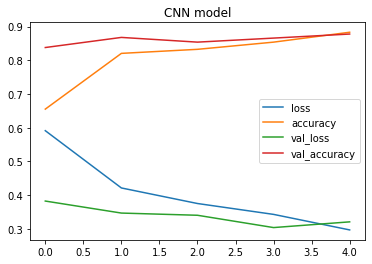

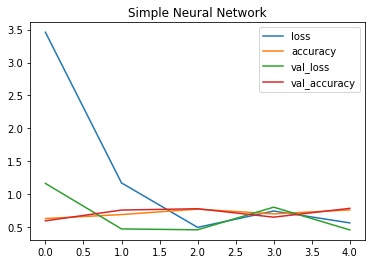

In [ ]:
import pandas as pd
hist1 = pd.DataFrame(history_1.history)
hist2 = pd.DataFrame(histroy_2.history)
hist1.plot(title = "CNN model" )
hist2.plot(title = "Simple Neural Network")

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Binary classification: Let's break it down
We just went through a whirlwind of steps:

* Become one with the data (visualize, visualize, visualize...)

* Preprocess the data (prepare it for a model and turn our data into batches)

* Create a model (start with a baseline)

* Fit the model

* Evaluate the model

* Adjust different parameters and improve model (try to beat your 
baseline)

* Repeat until satisfied 

Let's step through each.

1. Become one with data

['3540750.jpg']
Image shape :(384, 512, 3)
['72716.jpg']
Image shape :(512, 384, 3)


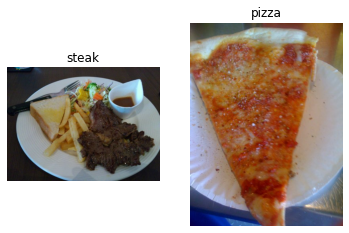

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_images("pizza_steak/train", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_images("pizza_steak/train", "pizza")

In [ ]:
# Make the path for our directories
train_dir = "pizza_steak/train"
test_dir = 'pizza_steak/test'

# create a train and test data generatore and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# load the data and make them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode= "binary", # type of data you are working with
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size =(224,224),
                                             class_mode = "binary",
                                             batch_size = 32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of traning data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
len(os.listdir("pizza_steak/train/pizza")) + len(os.listdir("pizza_steak/train/steak"))

1500

In [ ]:
1500/32  ## ~ 47 batches in total with each batch size equal to 32

46.875

In [ ]:
images[1]

array([[[0.31764707, 0.29803923, 0.28235295],
        [0.30588236, 0.2784314 , 0.25490198],
        [0.35686275, 0.32941177, 0.30588236],
        ...,
        [0.60784316, 0.5764706 , 0.53333336],
        [0.5882353 , 0.5568628 , 0.5137255 ],
        [0.6431373 , 0.6117647 , 0.5686275 ]],

       [[0.28235295, 0.2627451 , 0.2509804 ],
        [0.3019608 , 0.28235295, 0.26666668],
        [0.31764707, 0.29803923, 0.27450982],
        ...,
        [0.54509807, 0.61960787, 0.54509807],
        [0.45882356, 0.53333336, 0.45882356],
        [0.38823533, 0.46274513, 0.38823533]],

       [[0.2901961 , 0.27450982, 0.2627451 ],
        [0.24705884, 0.23137257, 0.21960786],
        [0.2627451 , 0.2509804 , 0.23137257],
        ...,
        [0.24705884, 0.34509805, 0.2627451 ],
        [0.22352943, 0.32156864, 0.2392157 ],
        [0.27058825, 0.36862746, 0.28627452]],

       ...,

       [[0.01960784, 0.03137255, 0.0509804 ],
        [0.02745098, 0.03921569, 0.05882353],
        [0.02745098, 0

In [ ]:
images.shape  # 32 in total with height and width 224 and color channels = 3

(32, 224, 224, 3)

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
# View the first batches of labels
labels # we got 0 and 1 so it could be 1 for pizza and 0 for steak as we have a binary type of classification problem

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

 ## 3. Create a CNN model (start with a baseline):

A **baseline** is a simple model that is made a with time we need to tune our model in order to beat our baseline model

In [ ]:
# to make code simpler lets import certain function
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [ ]:
#  for our baseline CNN model we can provide 3 conv2d layers
model_3 =  Sequential([
  Conv2D(filters = 10, # the number pf sliding window going across an input (higher = more complex)
         kernel_size = (3,3), # the size of sliding window going across window
         strides = (1, 1), # the size of steps the slider window takes 
         padding = "valid", # have 2 values same: outputshape remains same as input shape if valid if gets compressed
         activation = "relu",
         input_shape =(224, 224, 3)),
  Conv2D(10, 3, activation = "relu"),
  Conv2D(10, 3, activation = "relu"),
  Flatten(),
  Dense(1, activation = "sigmoid")
])


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

## Fit the model

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_3 = model_3.fit(train_data, # this is combination of features and labels
                        epochs = 5,
                        steps_per_epoch = len(train_data), # In each epoch take 47 individual step
                        validation_data = test_data,
                        validation_steps  = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 221ms/step - loss: 1.0309 - accuracy: 0.6707 - val_loss: 0.4898 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4451 - accuracy: 0.8053 - val_loss: 0.3990 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3115 - accuracy: 0.8740 - val_loss: 0.3593 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 9s 201ms/step - loss: 0.1905 - accuracy: 0.9320 - val_loss: 0.6503 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.0676 - accuracy: 0.9813 - val_loss: 0.5259 - val_accuracy: 0.8000


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.evaluate(test_data)

16/16 [==============================] - 2s 143ms/step - loss: 0.5259 - accuracy: 0.8000


[0.5258647799491882, 0.800000011920929]

5. Evaluate the model


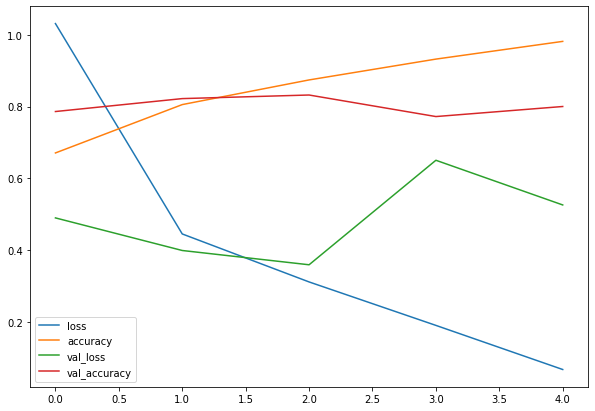

In [ ]:
# lets plot the training curve
pd.DataFrame(history_3.history).plot(figsize = (10, 7))

In [ ]:
# plot the validation and training curve seperately
def plot_loss_curves(history):
  """
  Return seperate loss curve for training and validation
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"])) #how many epochs did we run for
  # plot the losses
  plt.plot(epochs, loss, label ="training loss")
  plt.plot(epochs, val_loss, label ="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot the accuracy
  plt.figure() # when ever you want a seperate curve 
  plt.plot(epochs, accuracy, label ="training accuracy")
  plt.plot(epochs, val_accuracy, label ="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

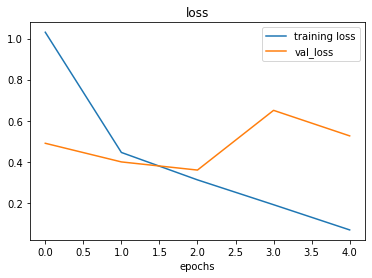

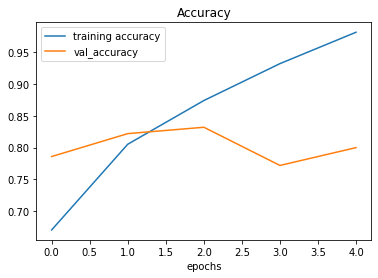

In [ ]:
# Check out our loss and accuracy of losses
plot_loss_curves(history_3)

> Whenever the validation loss curve starts to increase or in other words we can say that it does not decrease that much we can say that the model has **Overfitted** the data and the ability of model to ***generalize*** the data has diminished. we can also say that if the loss curve of validation data and training had large discripenscy or they vary by a large amount we can say that the model is overfitting 
we can see that in our graph as well if we see the loss curve



## 6. Adjust the model parameters:
1. Create a baseline
2. Beat the baseline by overfitting the larger model
3. Reduce the Overitting of the data

*Overfit methods:*
* Increase the number of Conv layers
* Increase the number of Conv Filters
* Add another dense layer to the output of the flatten layer

*Reduce the Overfitting of data* (it is also known as **Regulization**)
* Add data  Augmentation
* Add regulization layers ( such as MaxPool2D)
* Add more data ...

##Add regulization layers (MaxPool2D) layers 

In [ ]:
# Create a model (this is gonna be our new base line better then model_3 using the MaxPool2D for reducing the overfitting)
model_4 = Sequential([
  Conv2D(filters = 10,
         kernel_size = (3, 3),
         strides = (1, 1),
         activation = "relu",
         input_shape = (224, 224, 3)),
  MaxPool2D(pool_size =(2, 2)),
  Conv2D(10, 3, 1, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, 1, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = "sigmoid")
])


In [ ]:
# compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the data
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 213ms/step - loss: 0.6097 - accuracy: 0.6593 - val_loss: 0.4641 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4627 - accuracy: 0.7933 - val_loss: 0.3835 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4252 - accuracy: 0.8147 - val_loss: 0.3632 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4041 - accuracy: 0.8327 - val_loss: 0.3429 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3696 - accuracy: 0.8400 - val_loss: 0.3142 - val_accuracy: 0.8640


In [ ]:
# get teh summary of the model
model_4.summary() # as we compare the models we can see the no of parameters is decrease by as larger amount

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

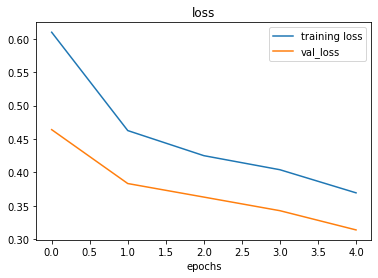

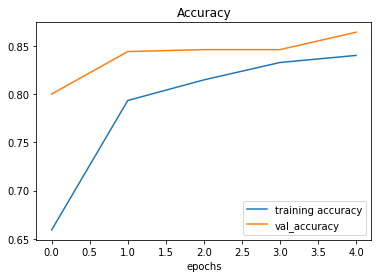

In [ ]:
# plot loss curves
plot_loss_curves(history_4)

>  As we can see the loss curve is tending to come down in same trend and if we train for more time that is increase number of epochs we can get the loss to get minimized.

So the MaxPool2D has done is removed the most of the parameters in the data thus it has taken only the most import parameters(by taking the higher values) to make model to learn the data. we can see the same in [CNN Explainer](https://poloclub.github.io/cnn-explainer) and hover over the MaxPool2D layers image and see the process of extracting max value from the set of pizeles and making it into one and decreasing the size of the data so as to reduce overfitting the data

## Add data Augmentation
>Data Augmntation is a process of altering the "Training data" , leading to have more diversity in the data by making some changes to the data such as rotate a picture to a certain degree to make it look different for the model so that it could generalize the data and hopefully learn the generalized patterns . 

In [ ]:
# Create ImageDataGenerator training instances with data Augmentation
train_datagen_augmenated = ImageDataGenerator(rescale = 1./255,
                                              rotation_range = 20, # rotate the image between the range of 0 to 20 degree randomly
                                              zoom_range = 0.2, # zoom into the image
                                              width_shift_range = 0.2, #Shift the image slightly width wise
                                              height_shift_range =0.2, # shift the image height wise
                                              horizontal_flip = True) # Flip the image on the horizontal axis
# create a ImageDataGenerator training instances without data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255)

# Create a ImageDataGenerator test instances without Data augmentation ( only the training data should be augmented)
test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
# Import the data and augment the training data
print("Augmented training Images:")
train_data_augmented = train_datagen_augmenated.flow_from_directory(directory = train_dir,
                                                                    target_size = (224, 224),
                                                                    batch_size = 32,
                                                                    class_mode = "binary",
                                                                    shuffle = False)
print("Non- Augmented training data")
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle= False)

print("test Images")
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "binary")

Augmented training Images:
Found 1500 images belonging to 2 classes.
Non- Augmented training data
Found 1500 images belonging to 2 classes.
test Images
Found 500 images belonging to 2 classes.


In [ ]:
# visualize 
images, labels = train_data.next()

augmented_images , augmented_labels = train_data_augmented.next()# labesl are not augmented but for the sake of convienience

28


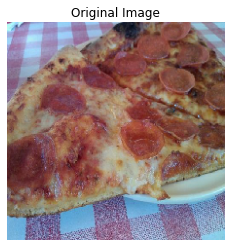

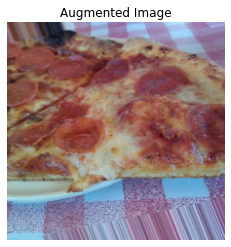

In [ ]:
random_number = random.randint(0, 32)
print(random_number)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False);



The augmented pictures are the same pictures but the difference are in the orientation or the placement9shifting) or the image might be flipped

now lets build a model that can take the input as augmented pictures instead of real pictures

In [ ]:
# create a model
model_5 = Sequential([
  Conv2D(filters = 10,
         kernel_size =(3,3),
         strides = (1,1),
         activation = "relu",
         input_shape =(224,224,3)),
  MaxPool2D(pool_size = (2,2)),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])
# Fit the model
history_5 = model_5.fit(train_data_augmented, # fitting model_5 on augmented training data
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,

                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 520ms/step - loss: 0.7096 - accuracy: 0.4453 - val_loss: 0.6866 - val_accuracy: 0.5460
Epoch 2/5
47/47 [==============================] - 23s 483ms/step - loss: 0.7097 - accuracy: 0.5513 - val_loss: 0.6783 - val_accuracy: 0.6100
Epoch 3/5
47/47 [==============================] - 23s 490ms/step - loss: 0.6718 - accuracy: 0.6293 - val_loss: 0.6056 - val_accuracy: 0.6860
Epoch 4/5
47/47 [==============================] - 24s 510ms/step - loss: 0.6266 - accuracy: 0.6813 - val_loss: 0.9694 - val_accuracy: 0.5380
Epoch 5/5
47/47 [==============================] - 23s 497ms/step - loss: 0.7242 - accuracy: 0.5347 - val_loss: 0.6432 - val_accuracy: 0.6300


In [ ]:
# it takes more time as it has to do data augmentation on the fly and has to fit the model as well
model_5.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

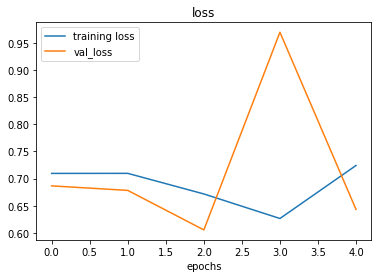

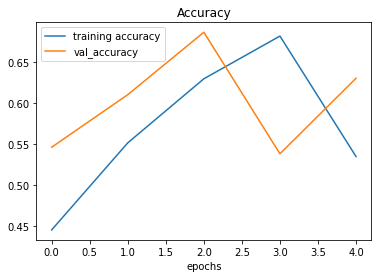

In [ ]:
plot_loss_curves(history_5)

>The accuracy of the model is less as the data we are providing is not randomized as we have kept the shuffle = False
Now let's create a data with the shuffle equals to True(default)

In [ ]:
train_datagen_augmeneted = ImageDataGenerator(rescale = 1./255,
                                              rotation_range = 20,
                                              zoom_range = 0.2,
                                              width_shift_range = 0.2,
                                              height_shift_range= 0.2,
                                              horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_data_augmented_shuffled = train_datagen_augmenated.flow_from_directory(directory=train_dir,
                                                                             target_size=(224,224),
                                                                             batch_size = 32,
                                                                             class_mode = "binary",
                                                                             shuffle =True)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size = (224,224),
                                             class_mode ="binary",
                                             batch_size = 32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# fit the model with train_data_augmented shuffled
model_6 = Sequential([
  Conv2D(filters = 10, kernel_size = 3, strides = 1, activation = "relu", input_shape = (224,224,3)),
  MaxPool2D(),
  Conv2D(10, 3, 1, activation = "relu"),
  MaxPool2D(),
  Conv2D(10, 3, 1, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = "sigmoid")
])
# compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])
# fit the model
history_6 = model_6.fit(train_data_augmented_shuffled,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 25s 527ms/step - loss: 0.6500 - accuracy: 0.5953 - val_loss: 0.6176 - val_accuracy: 0.6520
Epoch 2/5
47/47 [==============================] - 24s 505ms/step - loss: 0.5873 - accuracy: 0.6967 - val_loss: 0.4867 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 23s 495ms/step - loss: 0.5357 - accuracy: 0.7373 - val_loss: 0.3833 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 24s 513ms/step - loss: 0.4818 - accuracy: 0.7747 - val_loss: 0.3604 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 23s 494ms/step - loss: 0.4691 - accuracy: 0.7800 - val_loss: 0.3413 - val_accuracy: 0.8500


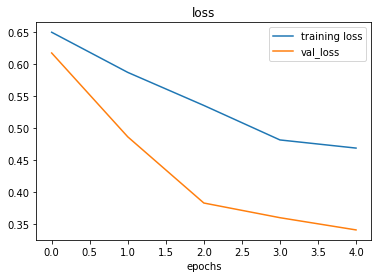

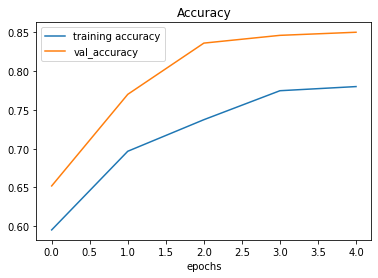

In [ ]:
plot_loss_curves(history_6)

In [ ]:
model_3.summary() # baseline model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### Repeat untill satisfied

Since we have already beaten our baseline so its time to improve the model:
* Increase the number of model layers(e.g. add more `Conv2D` / `MaxPool2D` layers.
* Increase the number of filtersin each convolutional layer( e.g. fom 10 to 32 or 64) 
* Train for longer(more epochs)
* Find the ideal learning rate
* Give more data
* Use **Transfer Learning** to leverage what another image classifiaction model has leann and adjust it for our dataset


--2022-05-14 00:28:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-05-14 00:28:25 (30.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

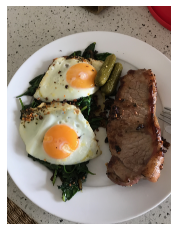

In [ ]:
# Better to make prdiction on the data
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg"
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)


In [ ]:
steak.shape

(4032, 3024, 3)

>  as we can see the shape of the image dont coincide with the shape of the trining images which is (None, 224, 224, 3) so lets create a function that can import the data read the data change the shape of data and make prediction on it

In [ ]:
def load_prep_pred_plot(model, filename, class_names = class_names, img_shape = 224):
  """
  read the image change the shape of the image and make the prediction and plot the predicted probability
  """
  # Read  the target file (image)
  img = tf.io.read_file(filename)
  # Decode the image
  img = tf.image.decode_image(img, channels = 3) # we are expecting our images to be decoded into 3 color channels
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescalling or Normalization of the image
  img = img/255.
  # so our image is in shape (224,224,3) but we require (None, 224,224,3) so we have to expand our image and make prediction 
  pred = model.predict(tf.expand_dims(img, axis =0)) # we dont want to store the dimmensions reduced image as at the time of plotting the inage required is (224,224,3) not (1, 224,224,3) thsi shape is only required at the time of making the prediction 
  # As pred is a predicition preobability we have to make prediction class so as we get the accurate results instead of prediction probability
  pred_class = class_names[int(tf.round(pred))]
  # Plot the prediction with title as prediction
  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False)

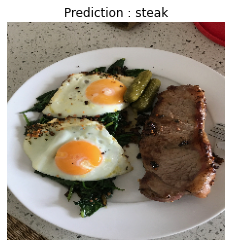

In [ ]:
load_prep_pred_plot(model_6, "03-steak.jpeg")

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

# Multi class Classification:

Steps involved in the CNN classification problem:
1. Become one with data
2. Preprocess the data(getting the data ready for the model)
3. Create a model(make a baseline - overfit the model to make sure its works)
4. Fit the model
5. Evaluate the model
6. Ajust different hyperparametrs to improve the model(try to beat the baseline and reduce overfitting)
7. Repeat untill satisfied

## 1. Import and become one with data

In [ ]:
import zipfile
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
# unzip the data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-14 00:41:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 173.194.217.128, 74.125.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   152MB/s    in 3.3s    

2022-05-14 00:41:03 (152 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
# walk through 10 class of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

there are 2 directories and 0 images in '10_food_classes_all_data'
there are 10 directories and 0 images in '10_food_classes_all_data/test'
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
there are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
there are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
there are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
there are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
there are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
there are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
there are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
there are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
there are 10 directori

In [ ]:
!ls  10_food_classes_all_data

test  train


In [ ]:
# lets create a train and test directories path
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"
# we have to get the classes names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['377190.jpg']
Image shape :(442, 512, 3)


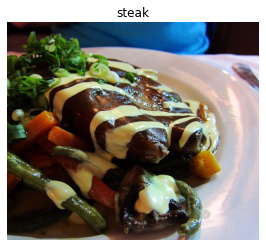

In [ ]:
import random
img = view_random_images(target_dir= train_dir,
                         target_class = random.choice(class_names))

### 2. Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# load the data
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "categorical") # for the data with multiclass classification we use categorical

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
## 3. Create a model(start with a baseline)
model_7 = Sequential([
  Conv2D(10, 3, 1, activation = "relu", input_shape = (224, 224, 3)),
  Conv2D(10, 3, 1, activation ='relu'),
  MaxPool2D(),
  Conv2D(10, 3, 1, activation = "relu"),
  Conv2D(10, 3, 1, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation = "softmax")
])

In [ ]:
# compile the model
model_7.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# fit the model
history_7 = model_7.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 206ms/step - loss: 2.1816 - accuracy: 0.1983 - val_loss: 2.0197 - val_accuracy: 0.2844
Epoch 2/5
235/235 [==============================] - 49s 207ms/step - loss: 1.8798 - accuracy: 0.3504 - val_loss: 1.9160 - val_accuracy: 0.3356
Epoch 3/5
235/235 [==============================] - 48s 204ms/step - loss: 1.4300 - accuracy: 0.5273 - val_loss: 2.0174 - val_accuracy: 0.3332
Epoch 4/5
235/235 [==============================] - 48s 206ms/step - loss: 0.8102 - accuracy: 0.7407 - val_loss: 2.6151 - val_accuracy: 0.3164
Epoch 5/5
235/235 [==============================] - 48s 205ms/step - loss: 0.3292 - accuracy: 0.9000 - val_loss: 3.2961 - val_accuracy: 0.2784


In [ ]:
plot_loss_curves(history_7)

> as we can see the variation in the training and the validation loss curve as if the model is learning perfectly on training data and not able to predict properly on validation it is due to the overfiting of the data 

In [ ]:
from tensorflow.keras.layers import Activation
# it might be because of the ofmany layers so lets remove some layers
model_8 = Sequential([
  Conv2D(10, 3, 1, input_shape = (224,224,3)),
  Activation(activation="relu"), # this is the other way of making the activation layer
  MaxPool2D(),
  Conv2D(10, 3, 1, activation ="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation= "softmax")
])
# compile
model_8.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# fit the model

history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
235/235 [==============================] - 47s 197ms/step - loss: 2.3117 - accuracy: 0.2200 - val_loss: 1.9841 - val_accuracy: 0.2900
Epoch 2/5
235/235 [==============================] - 46s 198ms/step - loss: 1.7836 - accuracy: 0.3928 - val_loss: 1.9441 - val_accuracy: 0.3372
Epoch 3/5
235/235 [==============================] - 47s 199ms/step - loss: 1.4330 - accuracy: 0.5244 - val_loss: 2.0620 - val_accuracy: 0.3084
Epoch 4/5
235/235 [==============================] - 48s 205ms/step - loss: 1.0018 - accuracy: 0.6823 - val_loss: 2.2537 - val_accuracy: 0.3200
Epoch 5/5
235/235 [==============================] - 46s 194ms/step - loss: 0.5914 - accuracy: 0.8260 - val_loss: 2.7171 - val_accuracy: 0.2876


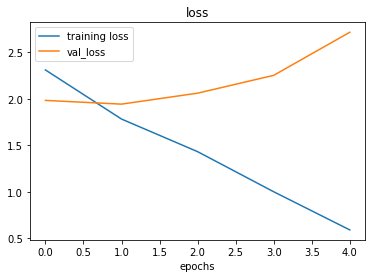

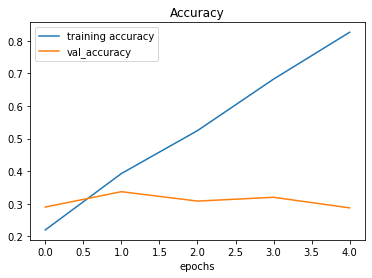

In [ ]:
# lets see the loss and accuracy curves
plot_loss_curves(history_8)

>even the simpler model is overfitting thus we can reduce overfitting:
1. Data Augmentation
2. More data
3. more MaxPool layers

In [ ]:
# lets try data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1./255,
                                              rotation_range = 20,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.2,
                                              shear_range = 0.2,
                                              zoom_range = 0.2,
                                              horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                    target_size = (224,224),
                                                                    batch_size = 32,
                                                                    class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# lets create a model based on the augmented images
# we can simply copy or clone the model by:

# model_9 = tf.keras.model.clone_model(model_8) ---but let's create once again

model_9 = Sequential([
  Conv2D(10, 3, 1, activation = "relu", input_shape = (224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, 1, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation = "relu")
])
# if we use clone we have still compile and train
model_9.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


history_9 = model_9.fit(train_data_augmented,
            epochs = 5,
            steps_per_epoch = len(train_data_augmented),
            validation_data = test_data,
            validation_steps = len(test_data)
            )

Epoch 1/5
235/235 [==============================] - 120s 504ms/step - loss: 8.8813 - accuracy: 0.1381 - val_loss: 8.8424 - val_accuracy: 0.1020
Epoch 2/5
235/235 [==============================] - 119s 508ms/step - loss: 8.8525 - accuracy: 0.1488 - val_loss: 8.8283 - val_accuracy: 0.1344
Epoch 3/5
235/235 [==============================] - 119s 504ms/step - loss: 8.8253 - accuracy: 0.1697 - val_loss: 8.7827 - val_accuracy: 0.2020
Epoch 4/5
235/235 [==============================] - 116s 496ms/step - loss: 8.8089 - accuracy: 0.1803 - val_loss: 8.7751 - val_accuracy: 0.1876
Epoch 5/5
235/235 [==============================] - 118s 503ms/step - loss: 8.8117 - accuracy: 0.1884 - val_loss: 8.7537 - val_accuracy: 0.2028


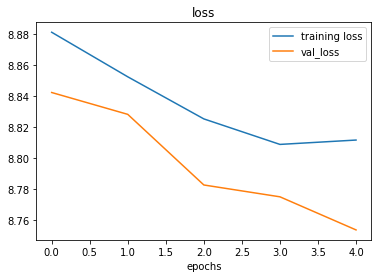

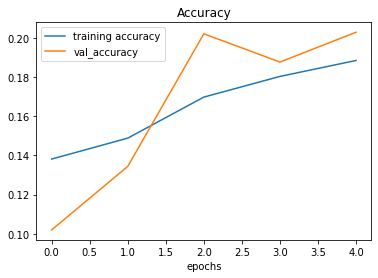

In [ ]:
# lets see the difference of graphs 
plot_loss_curves(history_9)

> as we can see the learning curves are getting better but the accuracy of the results are not so good we can increase the acuracy by twikibg a little with the augmented data make the number of layers increase .

It's a time taking procees.
we can also use the **transfer learning** which is learning of model that has already learned so making some changes can make that model to work on our data as well


In [ ]:
# lets make a prediction
# as we have made the load_prep_pred_plot function but its for binary classification lets take that for multiclass classification
def load_prep_pred_plot(model, filename, class_names = class_names, img_size = 224):
  """Read the image , make shape changes to the images so that it can be read by the model and predict the class and plot the image withg predicted labels
  """
  # Read the images
  img = tf.io.read_file(filename)
  # Decode the image
  img = tf.image.decode_image(img, channels = 3)
  # Resize the image
  img = tf.image.resize(img, [img_size, img_size])
  # rescalling the image
  img = img/255.
  # pred the image and we get prediction_probabilities
  pred = model.predict(tf.expand_dims(img, axis = 0))
  # Make if statefor the multiclass classification
  if len(pred[0]) > 1:
    pred_class = class_names[pred.argmax()] #if more than one output print max one
  else:
    pred_class = class_names[tf.round(pred)] # if only one class we have to rounf towards max and print
  # plot the image
  plt.imshow(img)
  plt.title(f"Prediction :{pred_class}")
  plt.axis(False)


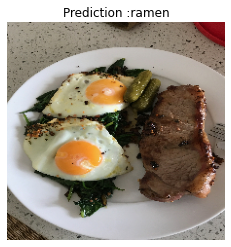

In [ ]:
load_prep_pred_plot(model_9, "03-steak.jpeg")

In [ ]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg"

--2022-05-14 01:24:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.07s   

2022-05-14 01:24:09 (50.6 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]



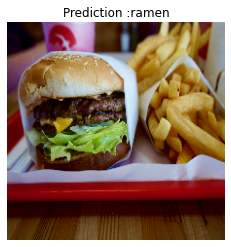

In [ ]:
load_prep_pred_plot(model_9, "03-hamburger.jpeg")

In [ ]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg"

--2022-05-14 01:25:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.06s   

2022-05-14 01:25:29 (29.2 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]



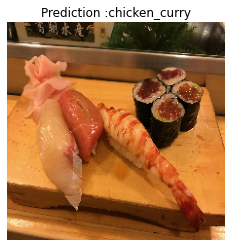

In [ ]:
load_prep_pred_plot(model_9, "03-sushi.jpeg")

In [ ]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg"

--2022-05-14 01:26:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-05-14 01:26:41 (42.2 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



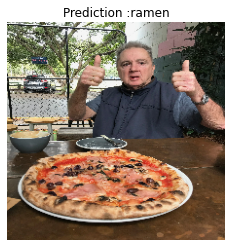

In [ ]:
load_prep_pred_plot(model_9, "03-pizza-dad.jpeg")

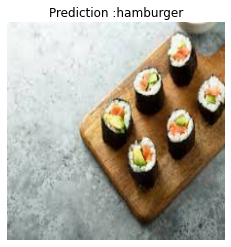

In [ ]:
# download the image and save to drive and u can use it as :
load_prep_pred_plot(model_9, "sushi.jpg")

> model_9 accuracy ist that good so we can use the transfered model that has learned something and make prediction on our data

In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 11s 142ms/step - loss: 8.7537 - accuracy: 0.2028


[8.75370979309082, 0.20280000567436218]

>saving the mode and importing it to predict the results

In [ ]:
# save the model
model_9.save("food_model")


INFO:tensorflow:Assets written to: food_model/assets


In [ ]:
# load the model
loaded_model_9 = tf.keras.models.load_model("food_model")
# evaluate the model to check if it is working
loaded_model_9.evaluate(test_data)

79/79 [==============================] - 12s 144ms/step - loss: 8.7537 - accuracy: 0.2028


[8.753706932067871, 0.20280000567436218]

In [ ]:
# compare it with model_9
model_9.evaluate(test_data)

79/79 [==============================] - 12s 147ms/step - loss: 8.7537 - accuracy: 0.2028


[8.753707885742188, 0.20280000567436218]

`Its the same!!!`